In [84]:
from histogram_plotter import HistPlotter
from sklearn.preprocessing import StandardScaler

import data_frame
import models
from utils import load_config, load_model

config_path = "configs/config.yml"
config = load_config(config_path)

filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"

df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())
X_train, y_train = df.get_train_dataset()
features = df.features

X_test_NM, y_test_NM = df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (~df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (~df.data["faint"]), "Z"]
X_test_OM, y_test_OM = df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (~df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (~df.data["faint"]), "Z"]
X_faint_NM, y_faint_NM = df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (df.data["faint"]), "Z"]
X_faint_OM, y_faint_OM = df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (df.data["faint"]), "Z"]

scaler = StandardScaler()
scaler.fit(X_train)

X_test_NM = scaler.transform(X_test_NM)
X_test_OM = scaler.transform(X_test_OM)
X_faint_NM = scaler.transform(X_faint_NM)
X_faint_OM = scaler.transform(X_faint_OM)

modelPath = f"../models/experiment2/MG_{config["num_components"]}_components_3/variables/variables"
model = load_model(modelPath, models.MixtureGaussian, df, config)

In [88]:
# import numpy as np
# index = np.random.randint(0, 13146, size=1113)
# y_test_NM.iloc[index].shape

In [89]:
# histPlotter = HistPlotter(X_test_NM, y_test_NM, "random", model, "GMM")
# histPlotter.evaluate_model()

Chi^2: 552.7778250121803


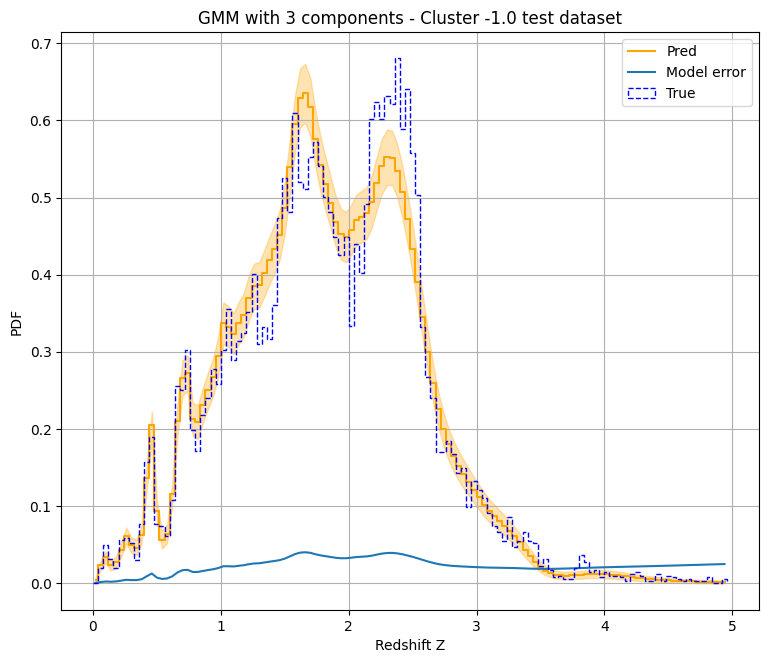

Chi^2: 1032.099771593346


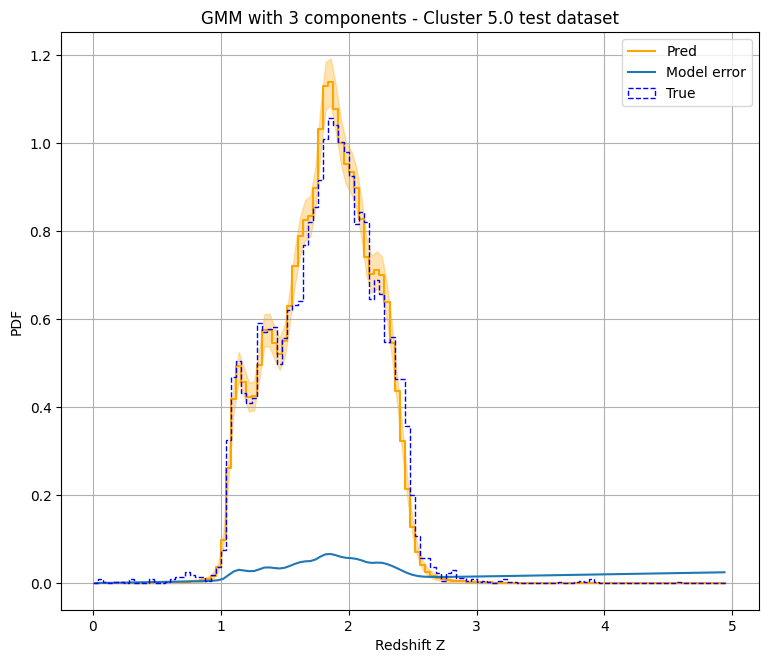

Chi^2: 685.3920594850554


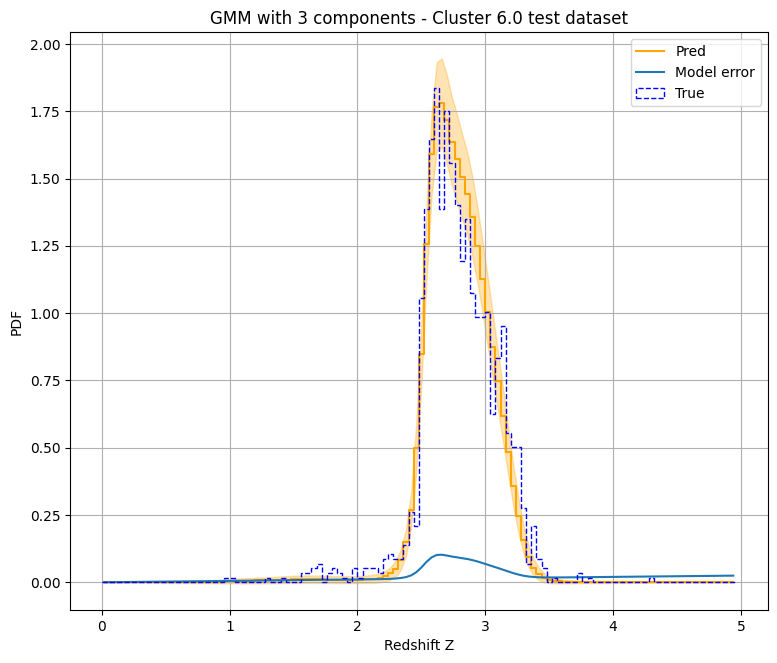

Chi^2: 1761.7362335144978


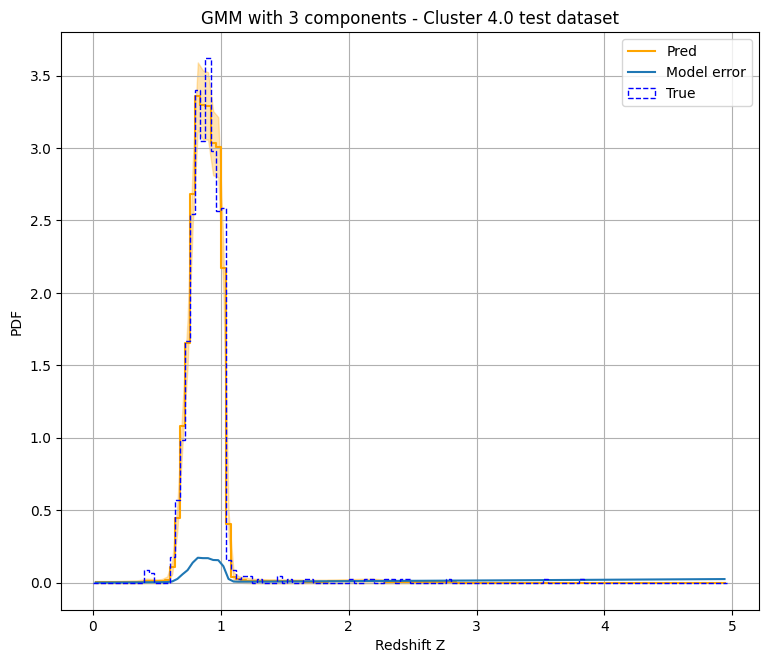

Chi^2: 748.6925444266009


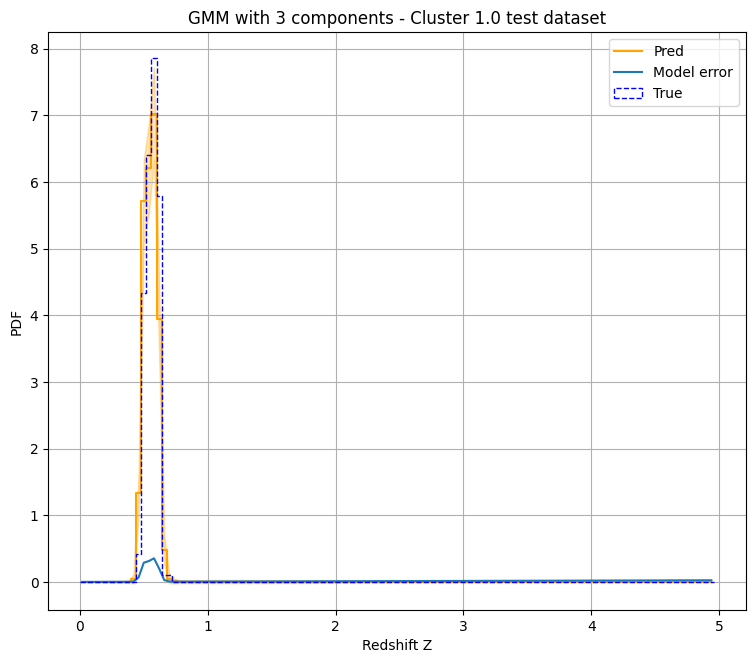

Chi^2: 248.42305050248507


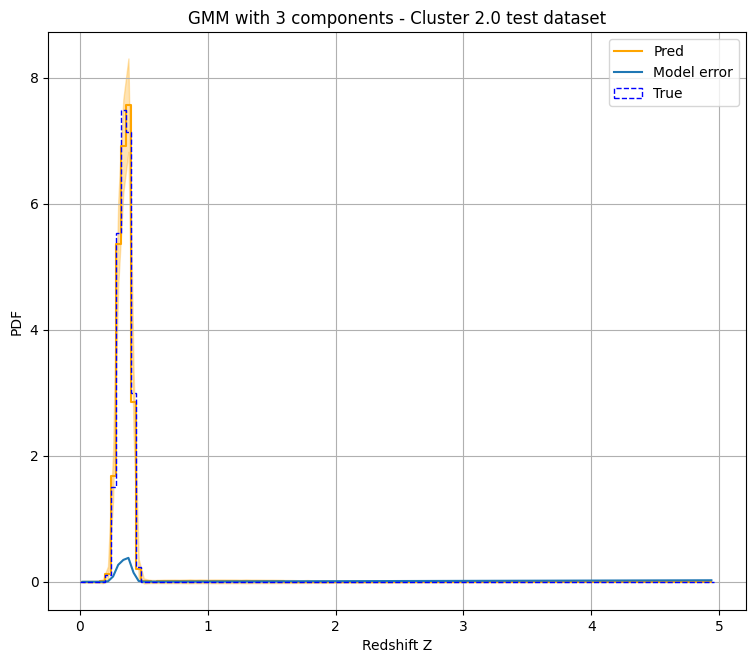

Chi^2: 4477.753542282319


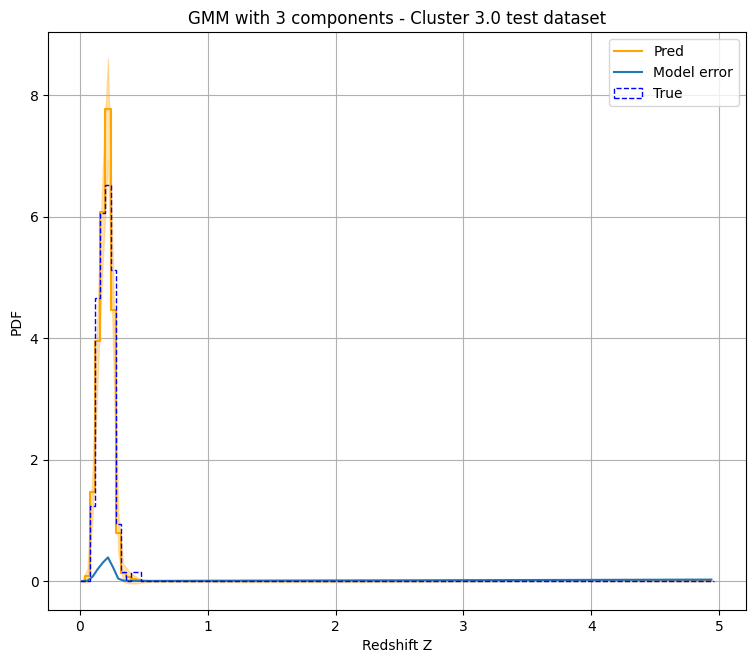

Chi^2: 127556.54803806066


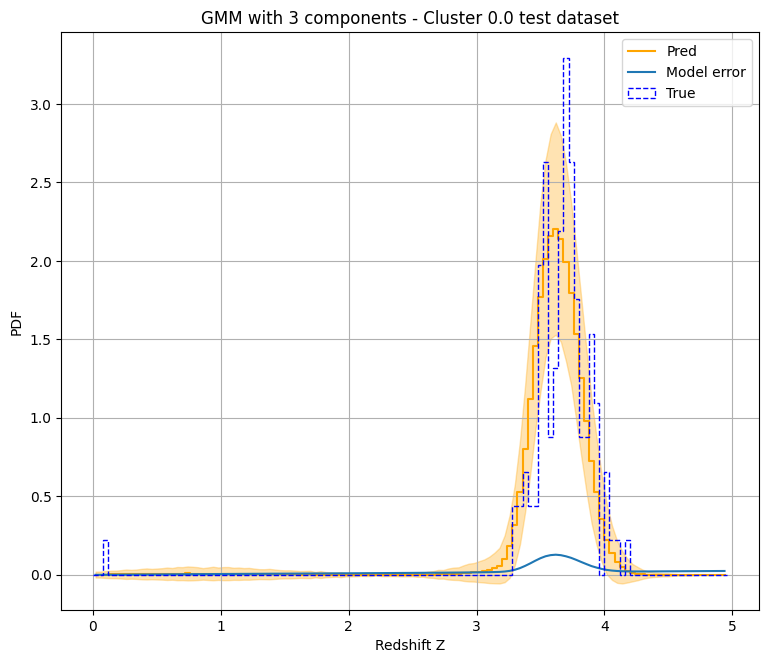

In [87]:
import pandas as pd

df = pd.read_csv("../dataframes/experiment3/MG_3_components_3.csv", index_col=0)
df = df.loc[df["split"] == "test"]
clusters = df["cluster"].value_counts().index.values

def return_cluster(df, cluster_num):
    df = df.loc[df["cluster"] == cluster_num]
    X, y = df.loc[:, features], df.loc[:, "Z"]
    X = scaler.transform(X)
    return X, y

for cluster in clusters:
    X, y = return_cluster(df, cluster)
    histPlotter = HistPlotter(X, y, f"Cluster {cluster}", model, "GMM")
    histPlotter.evaluate_model()